In [1]:
import numpy as np
import matplotlib.pyplot as plt

100


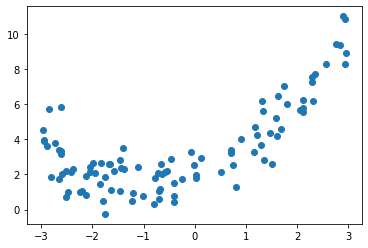

In [2]:
x = np.random.uniform(-3, 3, size = 100)
x_train = x.reshape(-1, 1)
y_train = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size = 100)  
print(y_train.size)
plt.scatter(x_train, y_train)

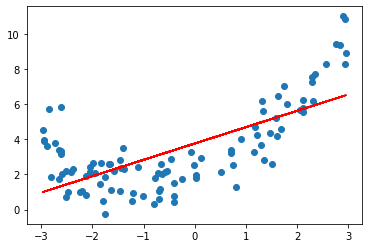

In [3]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(x_train, y_train)
y_predict = lg.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predict, color = 'r')
plt.show()

(100, 2)


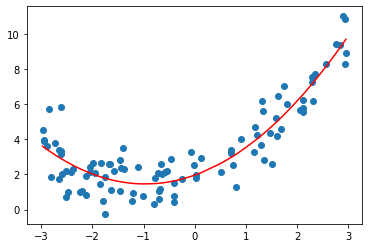

In [4]:
x_train2 = np.hstack([x_train, x_train**2])
print(x_train2.shape)
lg2 = LinearRegression()
lg2.fit(x_train2, y_train)
y_predict2 = lg2.predict(x_train2)
# print(y_predict2)
plt.scatter(x_train, y_train)
# print(np.sort(x_train2[:, 0]))
# print(np.argsort(x_train))
plt.plot(np.sort(x_train2[:, 0]), y_predict2[np.argsort(x_train2[:, 0])], color = 'r')#dont know where is wrong
# print(np.argsort(x_train))
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly = PolynomialFeatures(degree = 2)
poly.fit(x_train)
X2 = poly.transform(x_train)
X2.shape

(100, 3)

In [7]:
from sklearn.linear_model import LinearRegression
lg3 = LinearRegression()
lg3.fit(X2, y_train)
y_predict3 = lg3.predict(X2)

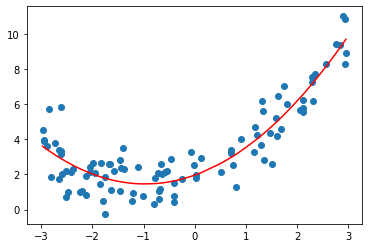

In [8]:
plt.scatter(x_train, y_train)
plt.plot(np.sort(X2[:, 1]), y_predict3[np.argsort(X2[:, 1])], color = 'r')
plt.show()

# pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

x = np.random.uniform(-3, 3, size = 100)
x_train = x.reshape(-1, 1)
y_train = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size = 100) 

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree = 112)),
    ("std_scalar", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [30]:
poly_reg.fit(x_train, y_train)
y_pre = poly_reg.predict(x_train)

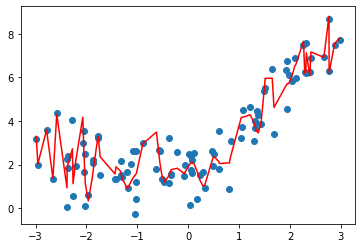

In [32]:
plt.scatter(x_train, y_train)
y_pre = poly_reg.predict(sorted(x_train))
plt.plot(sorted(x_train), y_pre, color = 'r')
plt.show()

# Learning curve

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state = 10) 

In [34]:
x_train.shape

(75, 1)

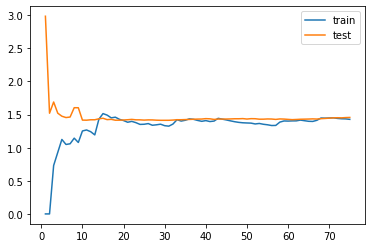

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []

for i in range(1, 76):
    lg = LinearRegression()
    lg.fit(x_train[:i], y_train[:i])
    
    y_train_predict = lg.predict(x_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lg.predict(x_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label = "train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label = "test")
plt.legend()
plt.show()